Neural Network are increasingly gaining popular in the filed of data science due to its ability to achieve a variety of tasks with a very high accuracy. In previous repository, we already explored many classification models using R codes and see its practical usage in implementation on different types of datasets. 
However, as neural network is a very complex topic, and without a deep understanding of its theoretical concepts, any application of available NN packages on Python would fall short in usage flexibility and modifications in real life problems. As such, this article would focus on the more mathematical algorithm concept of a neural network to explore each steps of the implementation of a popular Neural Network model. 


Objective
Human visual system is a very complex computing system that most do not realise how difficult it is to create a similar stimulated model. For example, the following numbers can be easily recognised as 25544. 

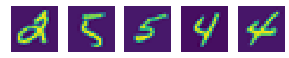

However, that simplification is actually a result of series of human visual cortex processes going through many hundreds of millions of neurons, ten billion connections between them. And yet, it was not just one visual cortex but five of them working interconnectedly on image processing. It can be seen that our brain visual system is a much more complicated model than Neural Network which also have many layers of neuron connecting with different activation functions. In the same way that it took us many of our early years in life to recognise these writings, Neural Network also relied on creating training sets and use these for its learning steps. 
As such, in this article, we will explore the process of building a neural network model which enables the computer the recognise different types of handwritten digits. 
The two Python libraries required for this article is NumPy, Pandas and Matplotlib for scientific computing, data manipulation and visualisation.


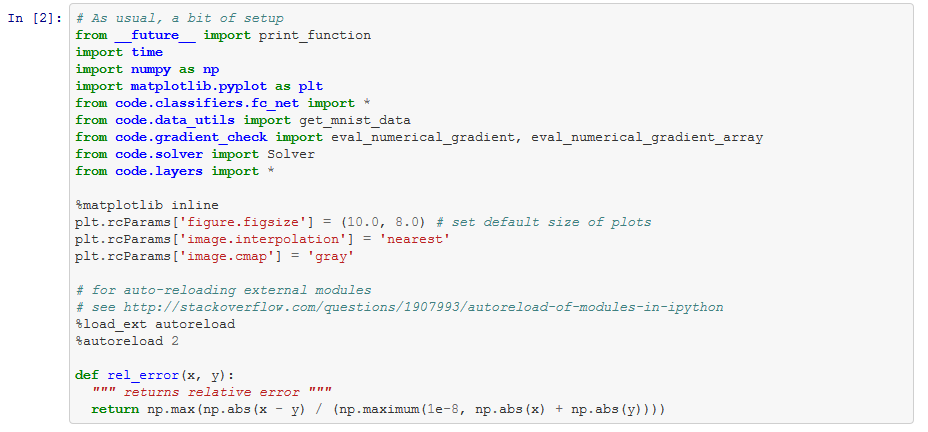

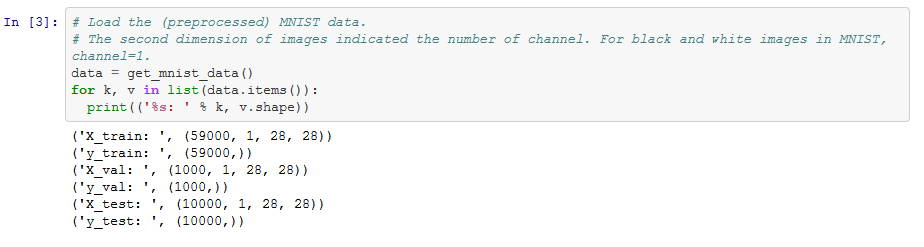

Defining the Neural Network model
 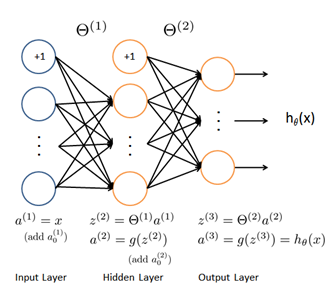
Our neural network has 3 layers — an input layer, a hidden layer and an output layer. Do recall that the inputs will be 20 x 20 grey scale images “unrolled” to form 400 input features which we will feed into the neural network. So, our input layer has 400 neurons. Also, the hidden layer has 25 neurons and the output layer 10 neurons corresponding to 10 digits (or classes) our model predicts. The +1 in the above figure represents the bias term.
We have been provided with a set of already trained network parameters. These are stored in ex4weights.mat and will be loaded into theta1 and theta2 followed by unrolling into a vector called ‘nn_params’. The parameters have dimensions that are sized for a neural network with 25 units in the second layer and 10 output units (corresponding to the 10-digit classes).
The codes are written as the following:


Feed forwarding steps
In order to apply the feed forwarding steps of the Neural Network, we will need the cost and activation functions. 
Generally in Machine Learning, when we fit our model we search the solution space for the most fitting solution; In the context of Neural Networks, the solution space can be thought of as the space of all functions our network can represent (or more precisely, approximate to any desired degree). We know that the size of this space depends on (at least) the depth of the network and the activation functions used. We also know that with at least one hidden layer followed by an activation layer using a squashing function, this space is very large, and that it grows exponentially with the depth of the network.
When we are using Stochastic Gradient Descent (SGD) to fit our network’s parameters to the learning problem at hand, we take, at each iteration of the algorithm, a step in the solution space towards the gradient of the loss function J(θ; X, y) in respect to the network’s parameters θ. Since the solution space of deep neural networks is very rich, this method of learning might overfit to our training data. This overfitting may result in significant generalization error and bad performance on unseen data (or test data, in the context of model development), if no countermeasure is used. Those countermeasures are called regularization techniques.
In this article, the following regularisation technique is used for computing. 

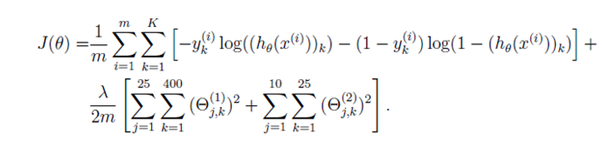
Where h(x(i)) is computed as shown in the Figure 2 and K = 10 is the total number of possible labels. Note that h(x(i)) = a(3) is the activations of the output units. Also, whereas the original labels (in the variable y) were 1, 2, …, 10, for the purpose of training a neural network, we need to recode the labels as vectors containing only values 0 or 1. It would be computed as the following:

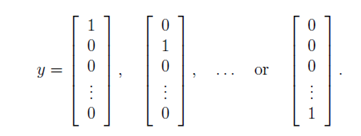

This process is called one-hot encoding. The way we do this is by using the ‘get_dummies’ function from the Pandas library.
As such, the codes for this section is written as:

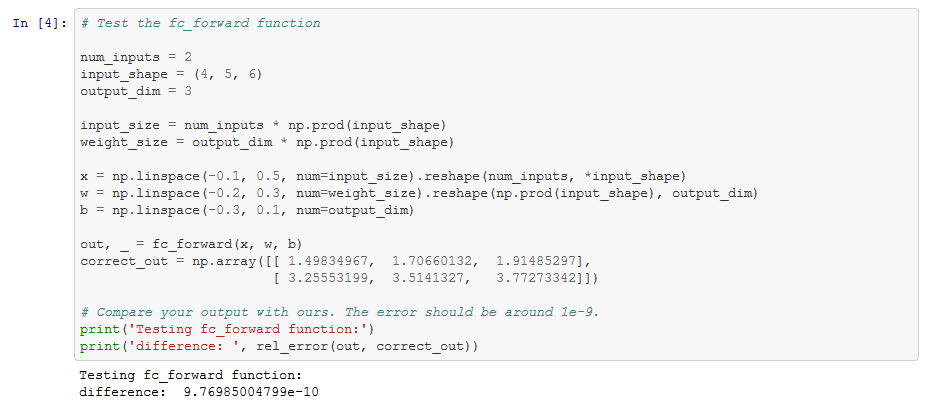

Backpropagation
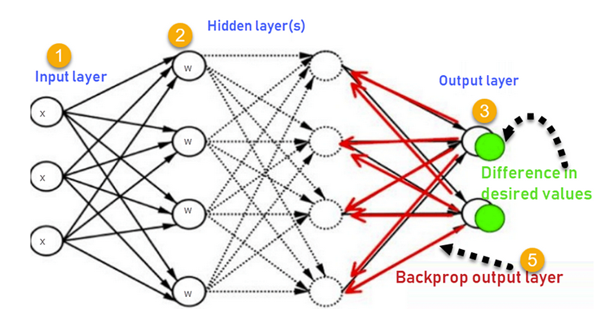
Now that we have calculated the error costs of our prediction during the feedforwarding stage, we also need to implement the backpropagation algorithm in order to minimize the costs function. This can be done by computing the gradient descent for the Costs function in order to reach the model’s global minimum point of errors.


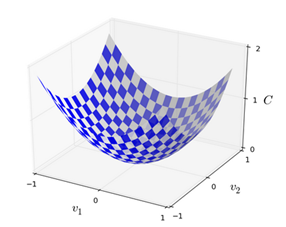
One way of attacking the problem is to use calculus to try to find the minimum analytically. We could compute derivatives and then try using them to find places where the costs function is an extremum. However, calculus does not work in this case as our neural network consisted of far more variables. As such, in this article, we are going to use an advanced optimizer called ‘fmincg’. 
First, however, we need to calculate the sigmoid gradient function and randomise the initialization values for symmetry breaking. Sigmoid gradient can be calculated using the following formula:


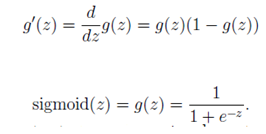
As for initialization values randomisation, here we randomly initialize parameters named initial_theta1 and initial_theta2 corresponding to hidden layer and output layer and unroll into a single vector as we did earlier.

Now that we have our sigmoid gradient and random initial values, we need to find a way to propagate the errors back evenly to minimise the costs and update our weight and biases. In order to do that, we need to apply the following steps and repeat them through every training example: 
1. Compute the forward propagate to get the output activation a3.
2. Calculate the error term d3 that’s obtained by subtracting actual output from our calculated output a3.
3. For hidden layer, error termd2 can be calculated as below:
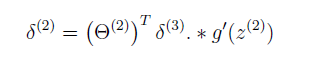
4. Accumulate the gradients in delta1 and delta2 .
5. Obtain the gradients for the neural network by diving the accumulated gradients (of step 4) by m.
6. Add the regularization terms to the gradients.
These would be coded in Python as the following:

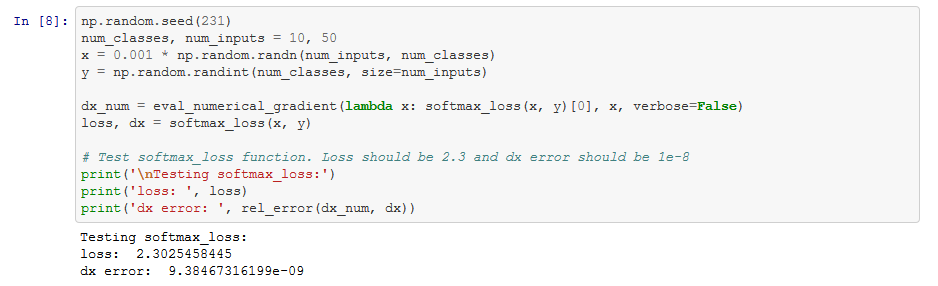

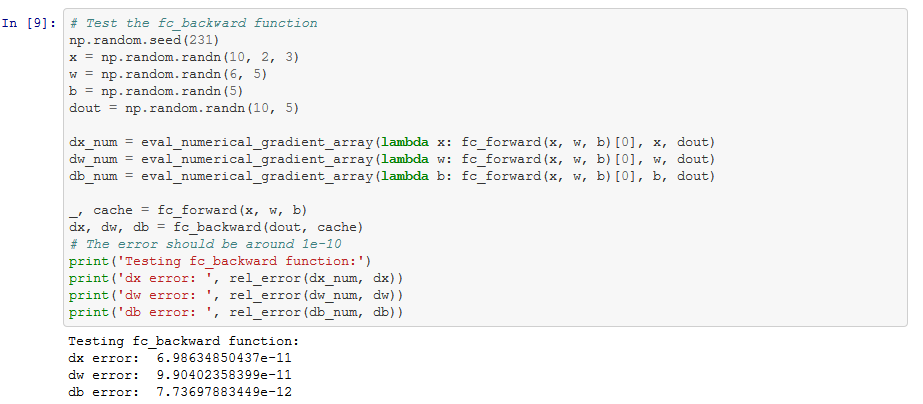

However, implementing backpropagation from scratch is usually more prune to bugs/errors. Therefore, it’s necessary before running the neural network on training data to check if our implementation of backpropagation is correct. Thus, we need to perform Gradient Checking, to make sure that our backprop algorithm has no bugs in it and works as intended. We can approximate the derivative of our cost function with:
 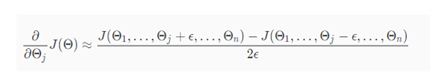
The gradients computed using backprop and numerical approximation should agree to at least 4 significant digits to make sure that our backprop implementation is bug free.


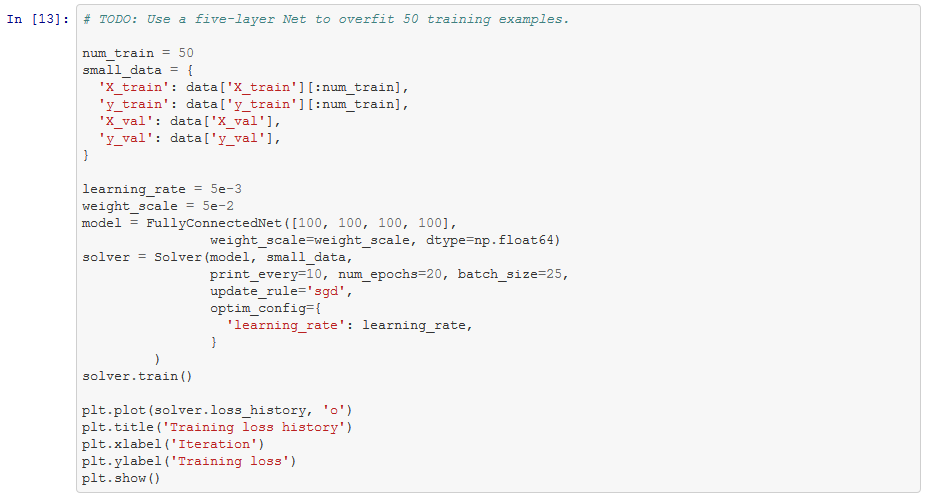

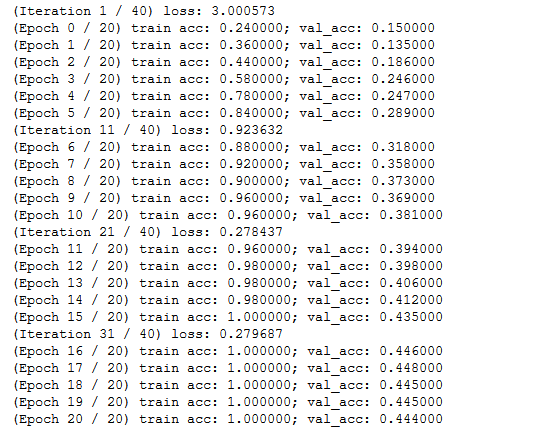

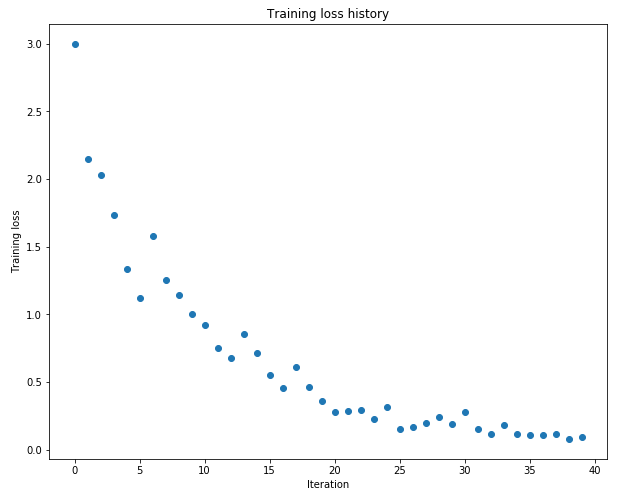

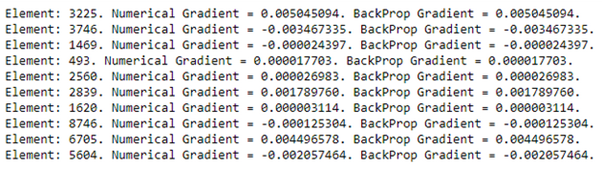

After we have successfully implemented the neural network cost function and gradient computation, the next step is to use ‘fmincg’ to learn a good set of parameters for the neural network. theta_opt contains unrolled parameters that we just learnt which we roll to get theta1_opt and theta2_opt.


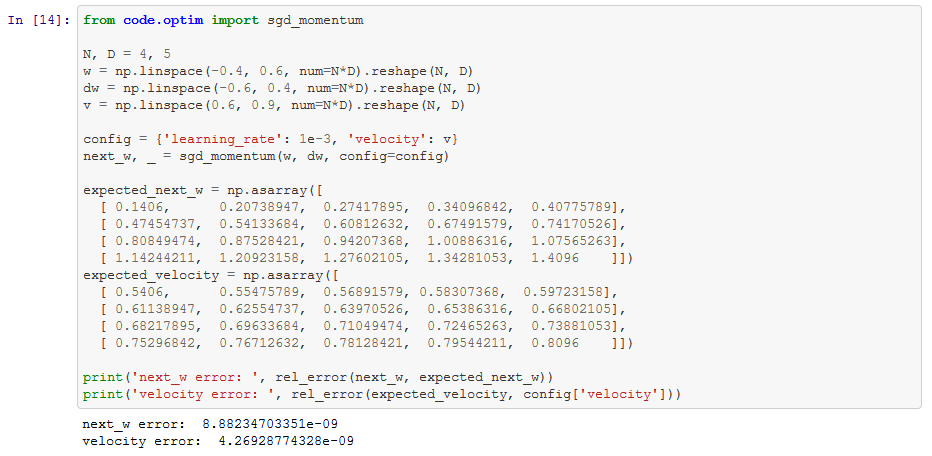

Prediction
Finally, we can put our model into practical usage after constructing it from scratch steps by steps. The aimed standard for most well-defined Neural Network have the result of 98%, however, as our model is much more basic, we would be happy to see a result of more than 95% accuracy. 
Apply the following codes for the prediction results:


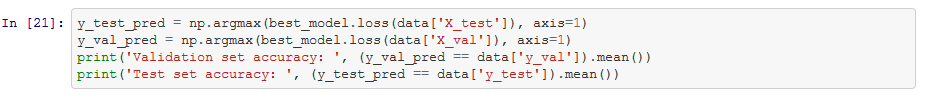

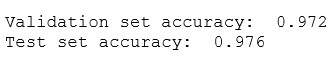

This resulted a value of 97.2% (this may vary by about 1% due to the random initialization). It is to be noted that by tweaking the hyperparameters we can still obtain a better accuracy.